## PUI2016_ExtraCredit_Project

# Analysis of Ground-level Ozone formation in Delhi, India

### Author: Avikal Somvanshi (as10724)

In [1]:
import pandas as pd
import pylab as pl
import os
import csv
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats
import sys
%pylab inline

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


# Data wrangling was done in a seperate notebook that can be found in the project folder

In [6]:
#Improting Delhi Pollution Data
df_pollution = pd.read_csv('Delhi_pollution_data_RK.csv', parse_dates=[0], infer_datetime_format=True, dayfirst=True)
df_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11856 entries, 0 to 11855
Data columns (total 8 columns):
Unnamed: 0                           11856 non-null datetime64[ns]
PM2.5_Concentration(microgram/m3)    11693 non-null float64
Ozone_Concentration(microgram/m3)    11782 non-null float64
NOx_Concentration(ppb)               11855 non-null float64
Temperature(Celsius)                 11856 non-null float64
Wind_Speed(m/s)                      11856 non-null float64
Relative_Humidity(%)                 11856 non-null float64
Solar_Radiation(w/m2)                11856 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 741.1 KB


In [7]:
df_pollution.columns

Index(['Unnamed: 0', 'PM2.5_Concentration(microgram/m3)',
       'Ozone_Concentration(microgram/m3)', 'NOx_Concentration(ppb)',
       'Temperature(Celsius)', 'Wind_Speed(m/s)', 'Relative_Humidity(%)',
       'Solar_Radiation(w/m2)'],
      dtype='object')

In [9]:
#Remaning columns for the ease of recall
df_pollution.columns = [['dt', 'PM25',
       'Ozone', 'NOx',
       'Temperature', 'Wind', 'Humidity',
       'Solar_Radiation']]

In [10]:
df_pollution.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,PM25,Ozone,NOx,Temperature,Wind,Humidity,Solar_Radiation
count,11693.000000,11782.000000,11855.000000,11856.000000,11856.000000,11856.000000,11856.000000
mean,127.671341,51.893113,168.641692,25.245209,1.214934,54.381272,112.831123
std,115.125828,61.026988,211.457149,8.119243,0.879161,20.365264,144.420861
min,10.170000,1.030000,6.600000,1.660000,0.300000,7.000000,1.180000
25%,NaN,NaN,NaN,20.517500,0.380000,37.920000,3.250000
50%,NaN,NaN,NaN,26.120000,1.030000,56.080000,11.540000
75%,NaN,NaN,NaN,30.850000,1.810000,71.670000,246.190000
max,985.000000,492.520000,1532.820000,44.680000,7.180000,88.130000,420.830000


In [11]:
#dropping NaNs
df_pollution.dropna(inplace=True)
df_pollution.describe()

,PM25,Ozone,NOx,Temperature,Wind,Humidity,Solar_Radiation
count,11619.000000,11619.000000,11619.000000,11619.000000,11619.000000,11619.000000,11619.000000
mean,127.777701,52.218189,170.482858,25.204179,1.210024,54.102103,112.820154
std,115.336202,61.303276,212.655023,8.162447,0.878032,20.357831,144.407784
min,10.170000,1.030000,6.600000,1.660000,0.300000,7.000000,1.180000
25%,53.830000,15.230000,43.710000,20.310000,0.380000,37.670000,3.250000
50%,90.500000,24.510000,86.640000,26.090000,1.030000,55.750000,11.500000
75%,164.000000,61.775000,198.575000,30.870000,1.800000,71.410000,245.545000
max,985.000000,492.520000,1532.820000,44.680000,7.180000,88.130000,420.830000


In [46]:
df_pollution.dt = pd.to_datetime(df_pollution.dt)


In [ ]:
# 100 μg/m3 8-hour mean (http://www.who.int/mediacentre/factsheets/fs313/en/)

Number of times hourly concntration of Ozone exceeded the standard =  723


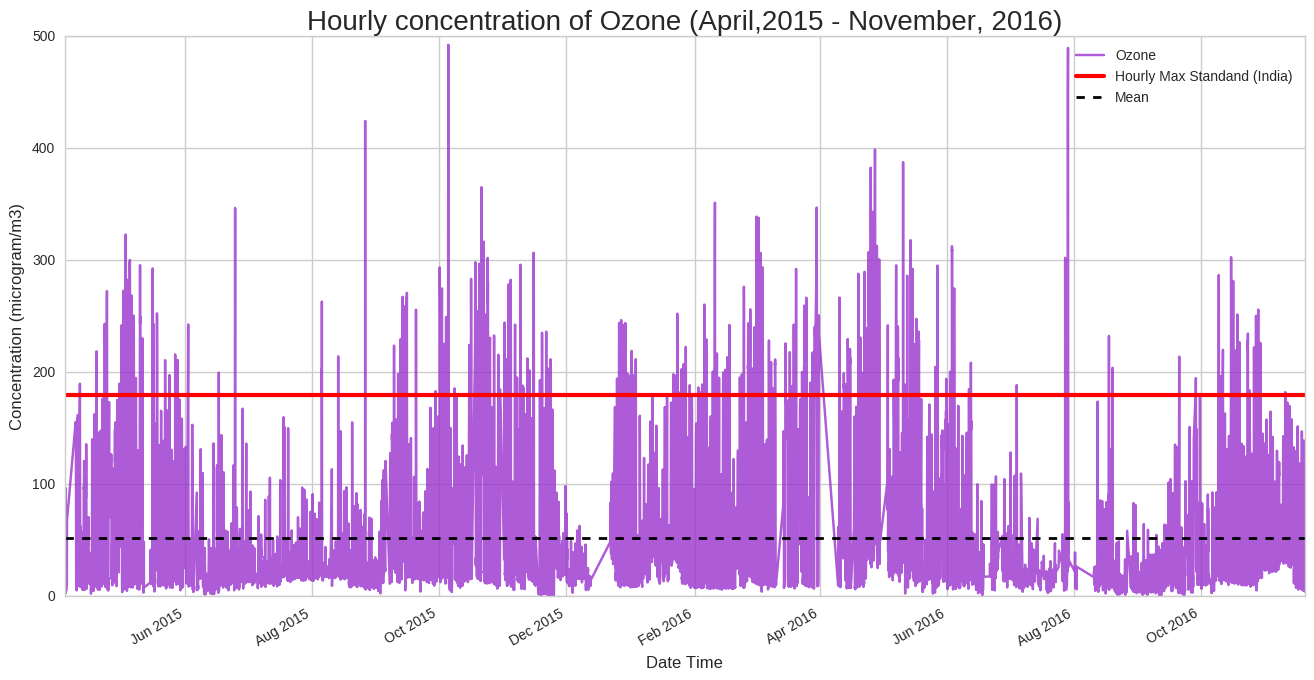

In [49]:
#Visual inspection for missing data and assessment of how many hourly the concenration levels exceeded standards
#India defines hourly maximum standard for ozone as 180 μg/m3 
# (source: http://www.arthapedia.in/index.php?title=Ambient_Air_Quality_Standards_in_India)

ozone_exceed = df_pollution.Ozone[df_pollution.Ozone > 180] 
print ('Number of times hourly concntration of Ozone exceeded the standard = ', ozone_exceed.count())

#Ploting
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution.plot(x='dt', y='Ozone', color='darkorchid',alpha=0.8, ax=ax)
pl.plot([df_pollution.dt[0], df_pollution.dt[11855]], [180,180], 'r', lw=3, label='Hourly Max Standand (India)')
pl.plot([df_pollution.dt[0], df_pollution.dt[11855]], [np.mean(df_pollution.Ozone),np.mean(df_pollution.Ozone)], 
        '--', color='black', lw=2, label='Mean')
pl.title('Hourly concentration of Ozone (April,2015 - November, 2016)', fontsize=20)
pl.ylabel("Concentration (microgram/m3)", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend(loc=1)
pl.show()

#### Caption: Ozone pollution is highest during spring-summer (March-June) and fall (October-November). This is xpected trend as ozone formation is a function of solar radiation as during the seasons of monsoon (July-September) and winter (Decmber-Feburary) the solar access is highly reduced in Delhi due to monsoon clouds and winter fog(smog) respectively. 

### Further, the dataset has multiple instances of missing most notibly in April and May of 2015, and Janurary, April, May and September of 2016. Therefore further analysis will be carried out with just June-December 2015 data. 

In [71]:
#slicing the dataset
df_pollution.index = pd.DatetimeIndex(df_pollution.dt)
df_pollution_sel = df_pollution[(df_pollution.index.year == 2016) & (df_pollution.index.month > 8)] #& (df_pollution.index.month < 12)]
df_pollution_sel.describe()

,PM25,Ozone,NOx,Temperature,Wind,Humidity,Solar_Radiation
count,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000
mean,167.793661,41.937199,204.121552,24.835028,0.900816,56.659696,107.340214
std,160.156616,47.557505,231.796805,6.843440,0.676917,16.948117,142.693499
min,10.170000,1.030000,10.630000,9.620000,0.300000,18.830000,2.920000
25%,67.170000,15.292500,42.295000,19.482500,0.320000,43.270000,3.420000
50%,117.825000,24.015000,107.870000,25.355000,0.635000,58.580000,6.000000
75%,202.002500,40.785000,269.930000,30.305000,1.330000,71.170000,230.772500
max,976.000000,302.910000,1320.220000,41.130000,3.320000,86.000000,400.580000


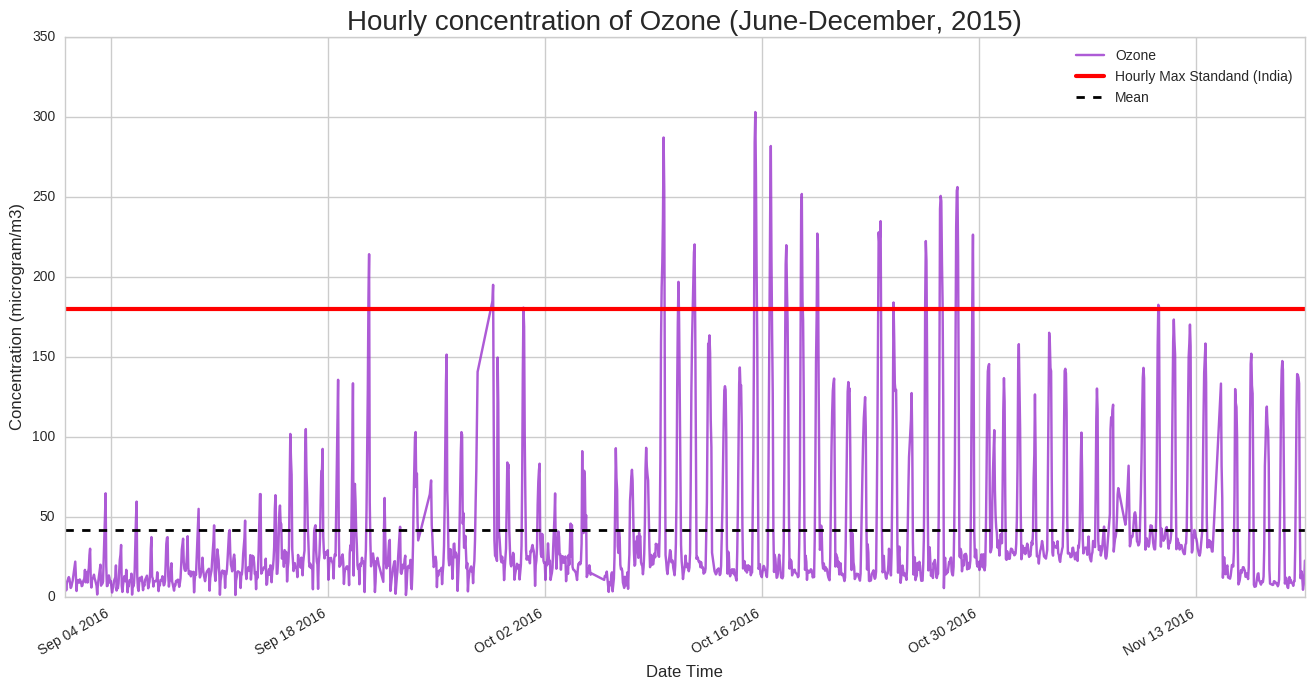

In [72]:
#Visualizing the selected time stamp

sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sel.plot(x='dt', y='Ozone', color='darkorchid',alpha=0.8, ax=ax)
pl.plot([df_pollution_sel.dt[0], df_pollution_sel.dt[1777]], [180,180], 'r', lw=3, label='Hourly Max Standand (India)')
pl.plot([df_pollution_sel.dt[0], df_pollution_sel.dt[1777]], [np.mean(df_pollution_sel.Ozone),np.mean(df_pollution_sel.Ozone)], 
        '--', color='black', lw=2, label='Mean')
pl.title('Hourly concentration of Ozone (June-December, 2015)', fontsize=20)
pl.ylabel("Concentration (microgram/m3)", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

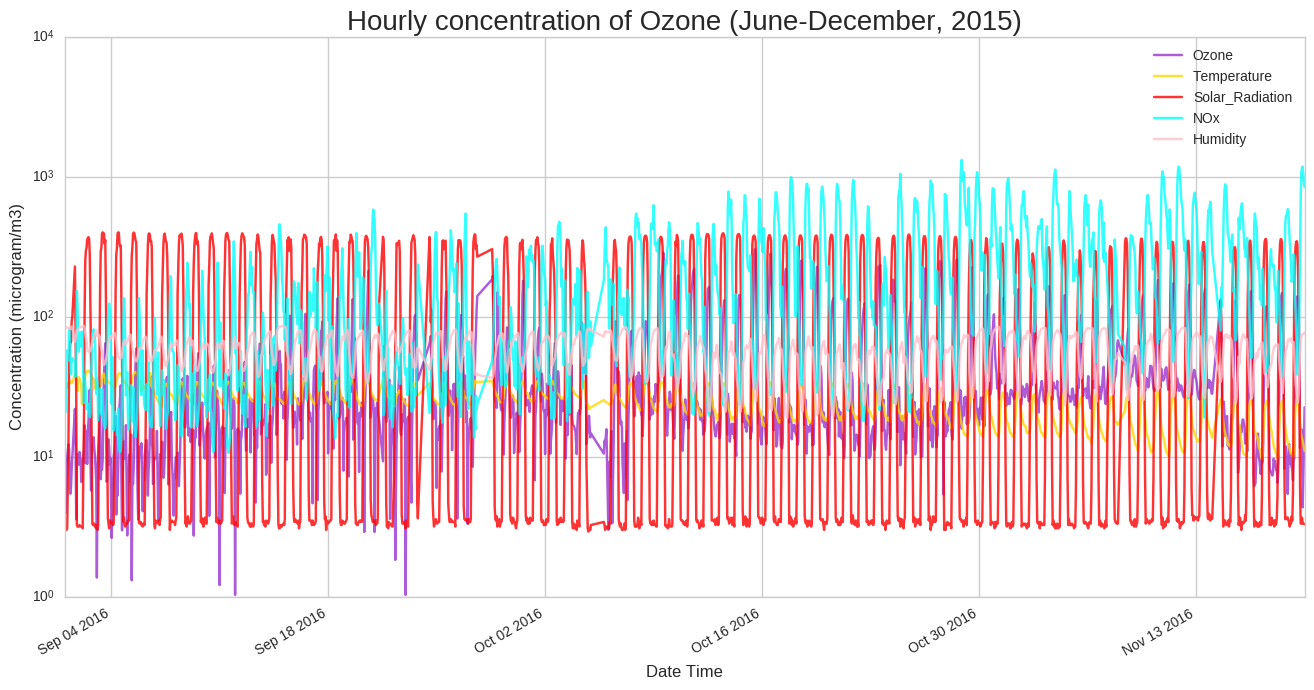

In [73]:
#Visualizing the selected time stamp
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sel.plot(x='dt', y='Ozone', color='darkorchid',alpha=0.8, ax=ax, logy=True)
df_pollution_sel.plot(x='dt', y='Temperature', color='gold',alpha=0.8, ax=ax, logy=True)
df_pollution_sel.plot(x='dt', y='Solar_Radiation', color='red',alpha=0.8, ax=ax, logy=True)
df_pollution_sel.plot(x='dt', y='NOx', color='cyan',alpha=0.8, ax=ax, logy=True)
df_pollution_sel.plot(x='dt', y='Humidity', color='pink',alpha=0.8, ax=ax, logy=True)
pl.title('Hourly concentration of Ozone (June-December, 2015)', fontsize=20)
pl.ylabel("Concentration (microgram/m3)", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

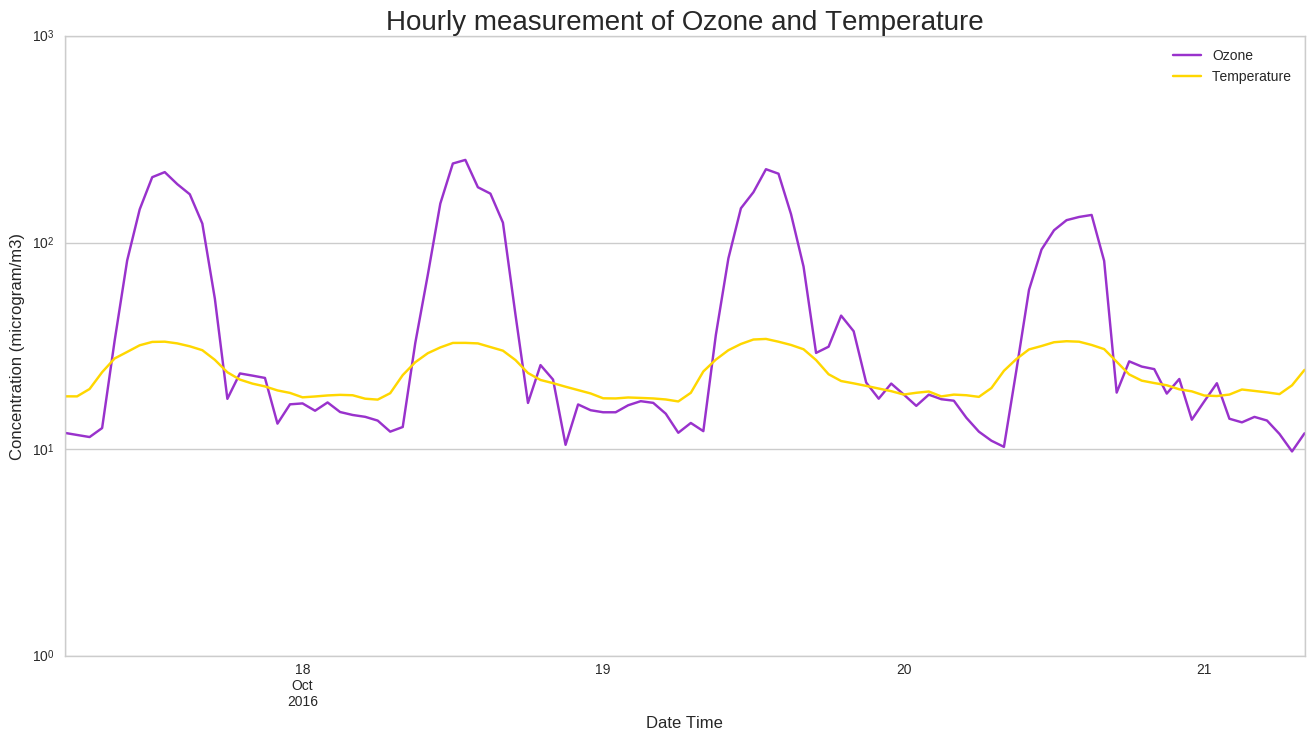

In [79]:
#Visualizing the selected time stamp zoomed
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sel[1000:1100].plot(x='dt', y='Ozone', color='darkorchid',alpha=1, ax=ax, logy=True)
df_pollution_sel[1000:1100].plot(x='dt', y='Temperature', color='gold',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Temperature', fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()
#ax.set_xlim(1000,1100)

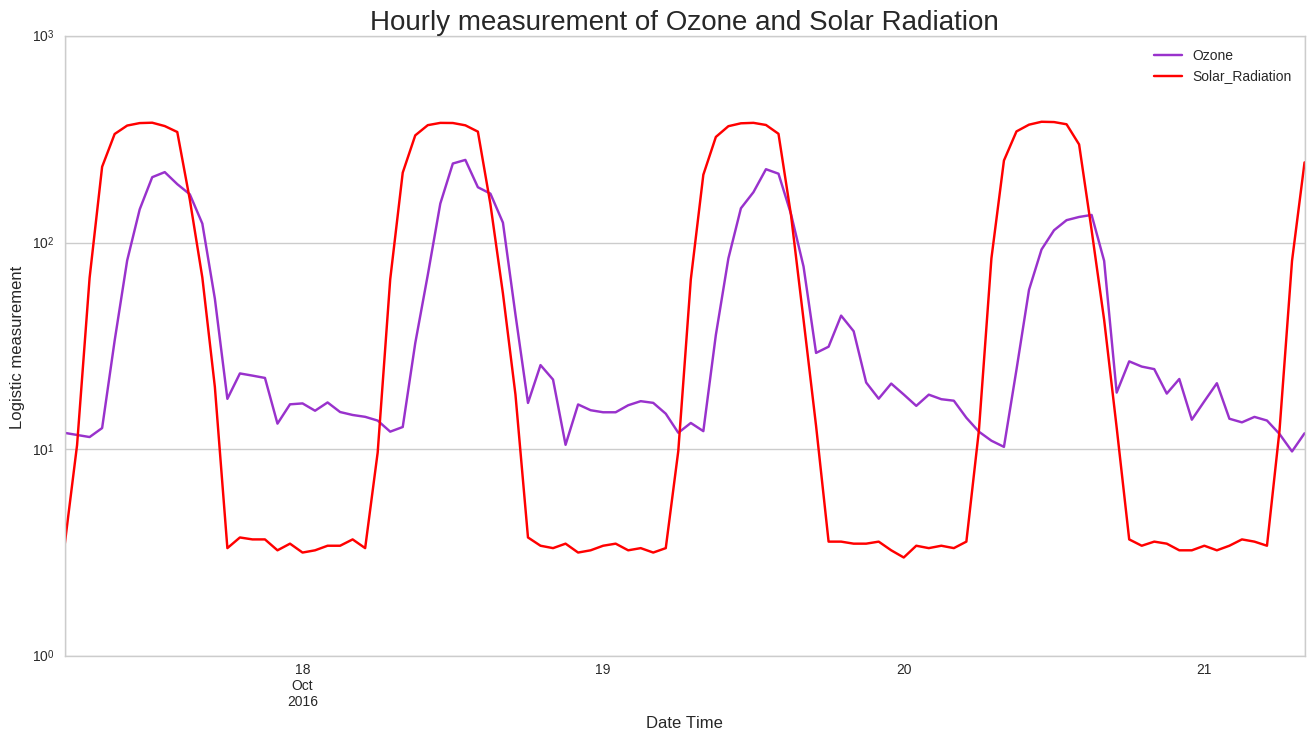

In [80]:
#Visualizing the selected time stamp zoomed
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sel[1000:1100].plot(x='dt', y='Ozone', color='darkorchid',alpha=1, ax=ax, logy=True)
df_pollution_sel[1000:1100].plot(x='dt', y='Solar_Radiation', color='red',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Solar Radiation', fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()
#ax.set_xlim(1000,1100)

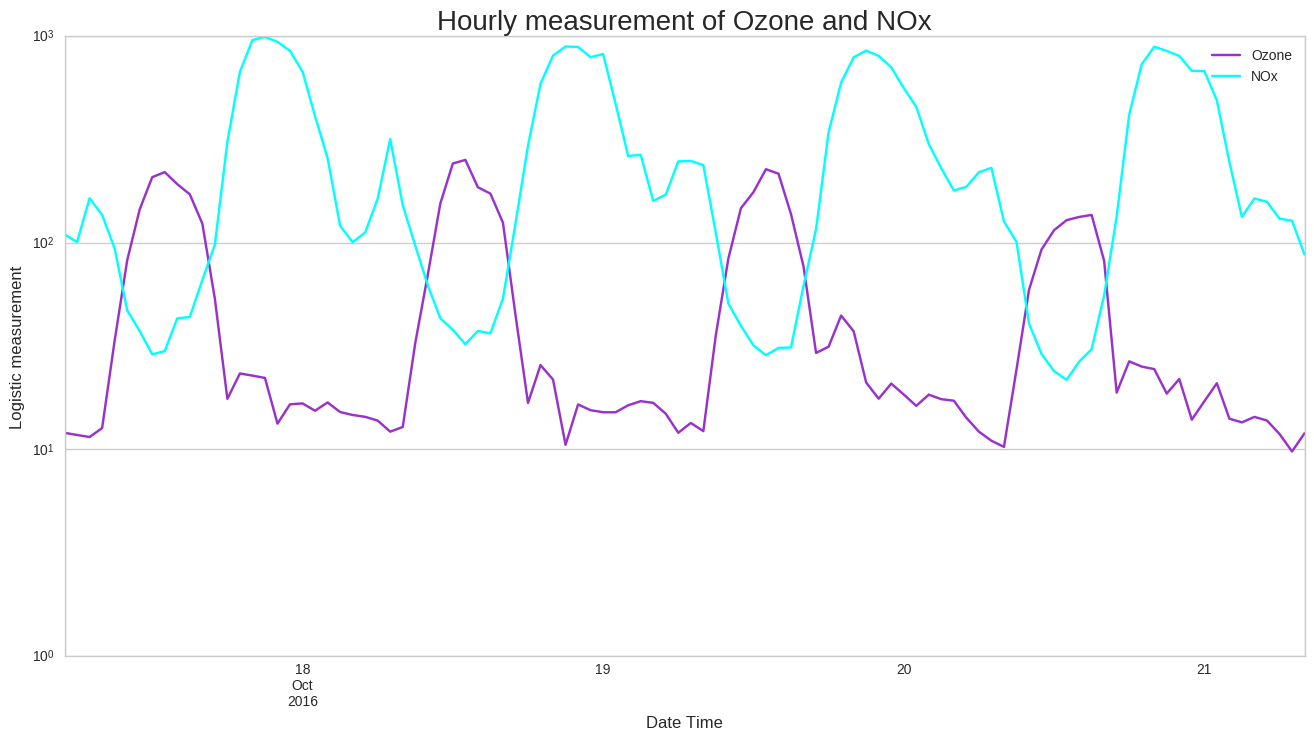

In [81]:
#Visualizing the selected time stamp zoomed
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sel[1000:1100].plot(x='dt', y='Ozone', color='darkorchid',alpha=1, ax=ax, logy=True)
df_pollution_sel[1000:1100].plot(x='dt', y='NOx', color='cyan',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and NOx', fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()
#ax.set_xlim(1000,1100)

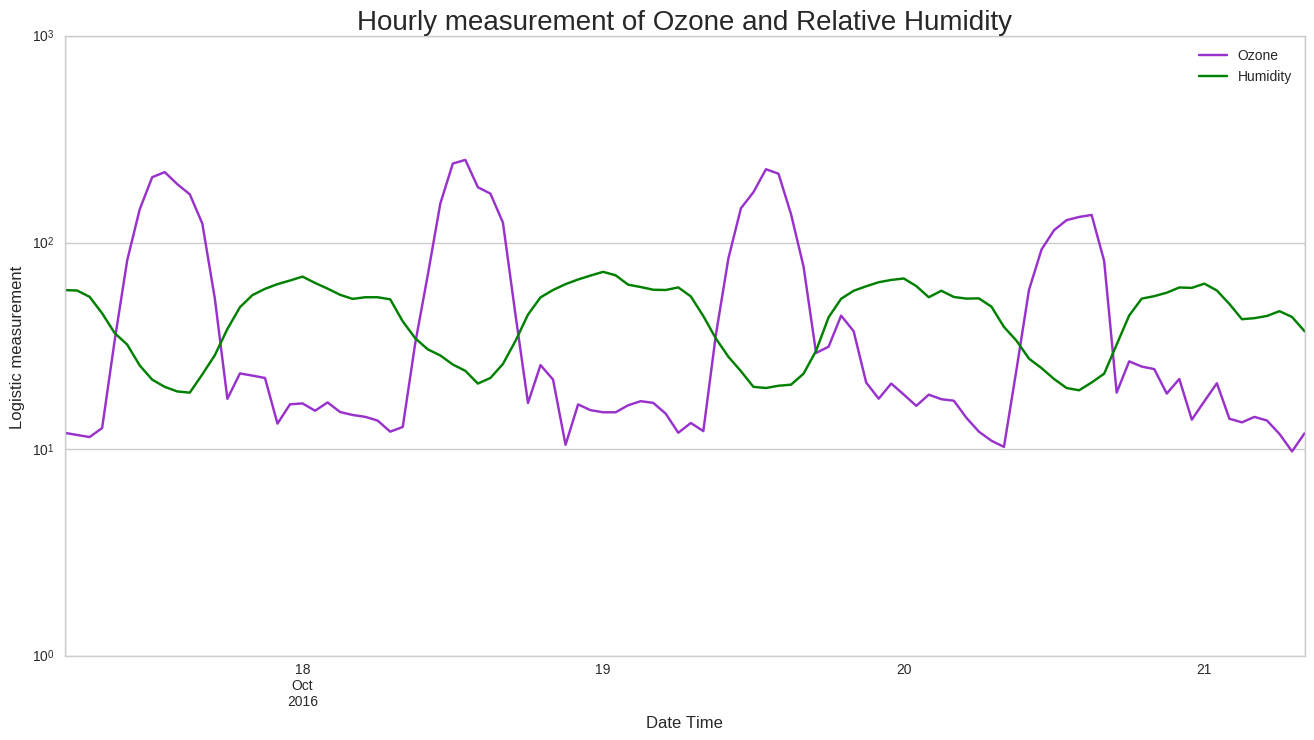

In [83]:
#Visualizing the selected time stamp zoomed
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sel[1000:1100].plot(x='dt', y='Ozone', color='darkorchid',alpha=1, ax=ax, logy=True)
df_pollution_sel[1000:1100].plot(x='dt', y='Humidity', color='green',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Relative Humidity', fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()
#ax.set_xlim(1000,1100)

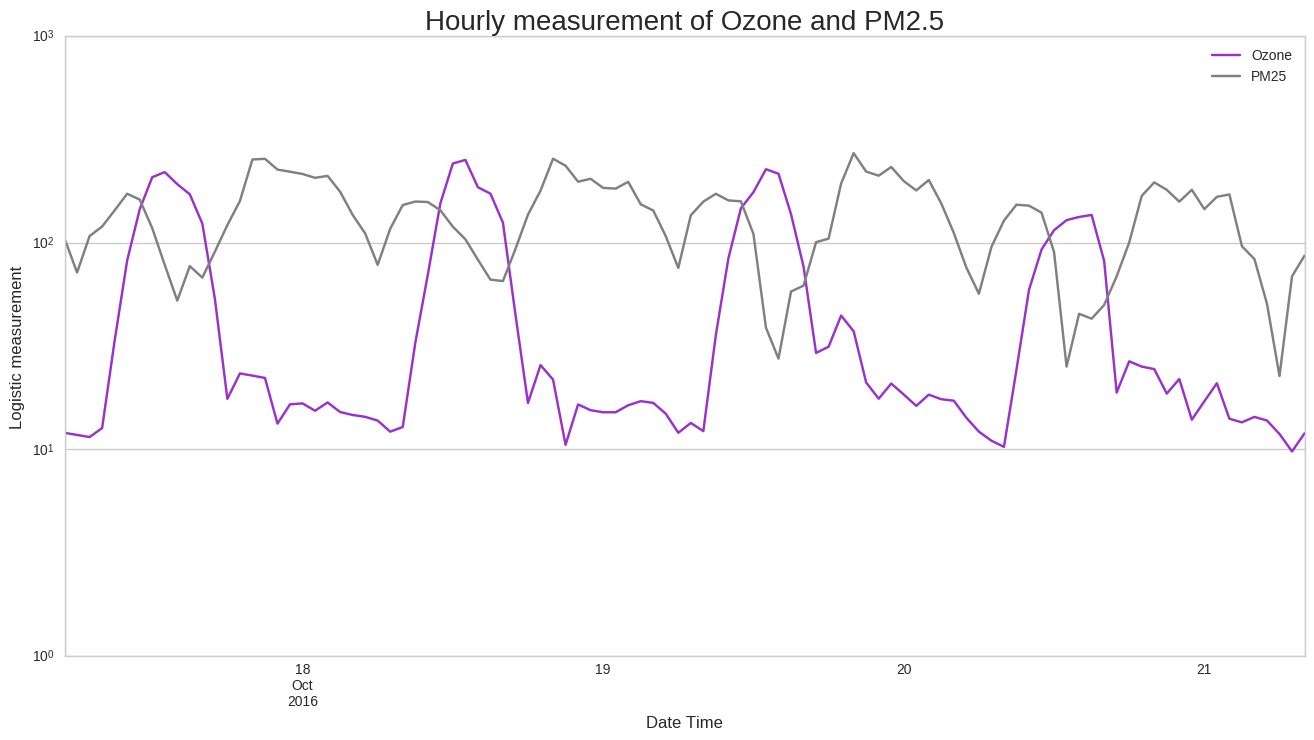

In [85]:
#Visualizing the selected time stamp zoomed
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sel[1000:1100].plot(x='dt', y='Ozone', color='darkorchid',alpha=1, ax=ax, logy=True)
df_pollution_sel[1000:1100].plot(x='dt', y='PM25', color='gray',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and PM2.5', fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()
#ax.set_xlim(1000,1100)

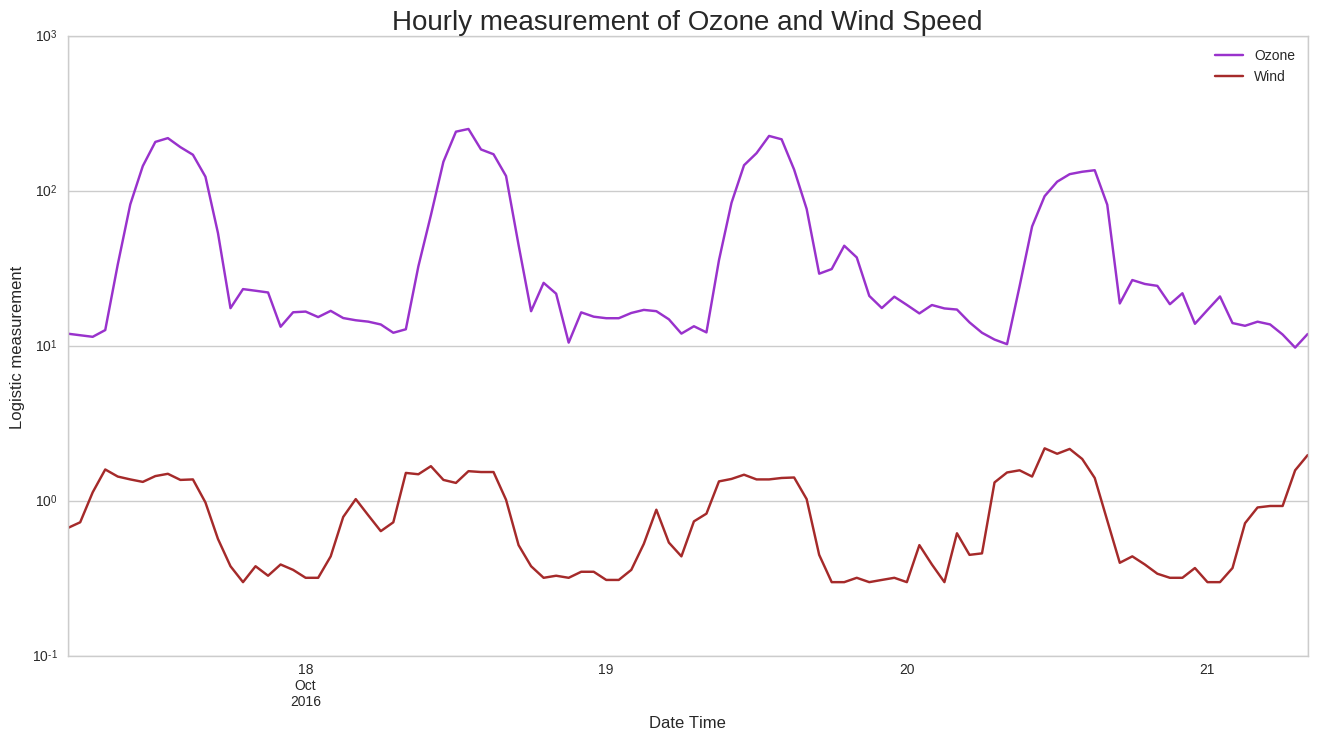

In [84]:
#Visualizing the selected time stamp zoomed
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sel[1000:1100].plot(x='dt', y='Ozone', color='darkorchid',alpha=1, ax=ax, logy=True)
df_pollution_sel[1000:1100].plot(x='dt', y='Wind', color='brown',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Wind Speed', fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()
#ax.set_xlim(1000,1100)

# Regression analysis

# alpha = 0.05

In [61]:
# Regression Model with all variables 
Regress_all = smf.ols(formula = 'Ozone ~ NOx + Temperature + Humidity + Solar_Radiation + Wind + PM25', data = df_pollution).fit()
Regress_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1420.
Date:                Wed, 14 Dec 2016   Prob (F-statistic):               0.00
Time:                        15:17:13   Log-Likelihood:                -61112.
No. Observations:               11619   AIC:                         1.222e+05
Df Residuals:                   11612   BIC:                         1.223e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         148.1149      3.550     41.719      0.000       141.156   155.074
NOx                -0.0121      0.003     -4.519      0.000        -0.017    -0.007
Temperature        -0.9824      0.083    -11.899      0.000        -1.144    -0.821
Humidity           -1.5427      0.029    -53.113      0.000        -1.600    -1.486
Solar_Radiation     0.1276      0.004     30.368      0.000         0.119     0.136
Wind               -0.6883      0.650     -1.059      0.290        -1.963     0.586
PM25                0.0065      0.005      1.303      0.193        -0.003     0.016
==============================================================================
Omnibus:                     3792.720   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20869.148
Skew:                           1.465   Prob(JB):                         0.00
Kurtosis:                       8.875   Cond. No.                     2.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# Regression Model after dropping wind and PM25 as they have p-values higher than alpha
Regress_2 = smf.ols(formula = 'Ozone ~ NOx + Temperature + Humidity + Solar_Radiation', data = df_pollution).fit()
Regress_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2129.
Date:                Wed, 14 Dec 2016   Prob (F-statistic):               0.00
Time:                        15:17:21   Log-Likelihood:                -61113.
No. Observations:               11619   AIC:                         1.222e+05
Df Residuals:                   11614   BIC:                         1.223e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         149.3711      3.021     49.450      0.000       143.450   155.292
NOx                -0.0097      0.002     -4.211      0.000        -0.014    -0.005
Temperature        -1.0347      0.074    -14.069      0.000        -1.179    -0.891
Humidity           -1.5478      0.028    -54.565      0.000        -1.603    -1.492
Solar_Radiation     0.1270      0.004     33.284      0.000         0.119     0.134
==============================================================================
Omnibus:                     3807.973   Durbin-Watson:                   0.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21002.385
Skew:                           1.471   Prob(JB):                         0.00
Kurtosis:                       8.893   Cond. No.                     1.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# Previous Regression Model without the intercept
Regress_2_wo = smf.ols(formula = 'Ozone ~ NOx + Temperature + Humidity + Solar_Radiation -1', data = df_pollution).fit()
Regress_2_wo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     4270.
Date:                Wed, 14 Dec 2016   Prob (F-statistic):               0.00
Time:                        15:22:14   Log-Likelihood:                -62223.
No. Observations:               11619   AIC:                         1.245e+05
Df Residuals:                   11615   BIC:                         1.245e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
NOx                 0.0238      0.002      9.805      0.000         0.019     0.029
Temperature         1.9761      0.045     43.545      0.000         1.887     2.065
Humidity           -0.4119      0.018    -22.495      0.000        -0.448    -0.376
Solar_Radiation     0.1558      0.004     37.574      0.000         0.148     0.164
==============================================================================
Omnibus:                     3073.307   Durbin-Watson:                   0.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11007.824
Skew:                           1.301   Prob(JB):                         0.00
Kurtosis:                       6.996   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model's R2 and adj_R2 improves after dropping the intrcept. Don't know why.